# DS4200 Homework 4

Due: Friday Nov 15th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Part 1: Altair interactive plots

Gapminder is a non-profit organization that promotes global sustainable development and seeks to bridge the gap between misconceptions and data-driven understanding. We are going to explore the a small subset of its data with the information of average income, health score and population for each country in the world. The region information is also provided. 

In [6]:
import altair as alt
import pandas as pd

gapminder = pd.read_csv('gapminder-health-income.csv')
gapminder.head()

country  income  health  population                    region
0  Afghanistan    1925   57.63    32526562                south_asia
1      Albania   10620   76.00     2896679       europe_central_asia
2      Algeria   13434   76.50    39666519  middle_east_north_africa
3      Andorra   46577   84.10       70473       europe_central_asia
4       Angola    7615   61.00    25021974        sub_saharan_africa

### Part 1.1 Add selection (5 points)

Make a scatter plot to show the relationship between average personal income and average health score. Use the Region as the original color. Please add tooltip to it to show the information about the country name and population. Also, allow the user to select a single country to highlight while all the other become light grey. 

In [7]:
highlight = alt.selection_single(
    fields=['country'], 
    empty='none'  # Ensures that at least one selection is active
)

scatter = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.condition(
        highlight,  # Highlighted points maintain their original region color
        'region:N', # Use the 'region' field for color encoding
        alt.value('lightgrey')  # Unselected points become light grey
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=','),
        alt.Tooltip('health:Q', title='Health', format=',.2f')
    ]
).add_selection(
    highlight
).properties(
    width=800,
    height=600,
    title="Scatter Plot: Income vs. Health by Region"
)

scatter

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/vegalite/v5/api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: Futu

alt.Chart(...)

### Part 1.2 Customize the color (10 points)

Now choose a customized color map for the previous question. Explain how you choose the color map and apply it to the plot. 

In [8]:
import altair as alt

highlight = alt.selection_point(
    fields=['country'], 
    empty=True  
)

scatter = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color='region:N',  # Use region for distinct colors
    opacity=alt.condition(
        highlight,
        alt.value(1),  # Highlighted points fully opaque
        alt.value(0.3)  # Non-highlighted points semi-transparent
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=','),
        alt.Tooltip('health:Q', title='Health', format=',.2f')
    ]
).add_params(
    highlight
).properties(
    width=800,
    height=600,
    title="Scatter Plot: Income vs. Health by Region"
)

scatter

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

I chose this color, so that it encodes the region field as region:N, where each region can then be shown as its own color, from Altair's default palette. By using these distinct colors for each region, it makes it easier for the viewer to see clusters or paterns just based on the regions. 

### Part 1.3 Select across multiple panels (5 points)

Now add an interval selection such that the user can select over any income range, such that we can generate a second plot to show the relationship between income and population for the given range. 

In [9]:
import altair as alt

income_selection = alt.selection_interval(
    encodings=['x']  
)

scatter_health = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color='region:N',  
    opacity=alt.condition(
        income_selection,
        alt.value(1), 
        alt.value(0.3) 
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=','),
        alt.Tooltip('health:Q', title='Health', format=',.2f')
    ]
).add_params(
    income_selection
).properties(
    width=800,
    height=400,
    title="Scatter Plot: Income vs. Health by Region"
)

scatter_population = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('population:Q', title='Population', scale=alt.Scale(type='log')),
    color='region:N',  
    opacity=alt.condition(
        income_selection,
        alt.value(1),  
        alt.value(0)  
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=',')
    ]
).transform_filter(
    income_selection 
).properties(
    width=800,
    height=400,
    title="Scatter Plot: Income vs. Population (By Income Range)"
)

combined_plot = scatter_health & scatter_population

combined_plot

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)

### Part 1.4 Data binding (10 points)

Instead of the using the legend, now include a radio button or the region such that each selection only highlights one region and make the other points to be grey. 

In [4]:
import altair as alt

region_selection = alt.selection_point(
    fields=['region'],  
    bind=alt.binding_radio(
        options=sorted(gapminder['region'].unique()), 
        name="Select Region: "
    ),
    empty="all"  
)

scatter_health = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.condition(
        region_selection,
        'region:N', 
        alt.value('lightgrey') 
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=','),
        alt.Tooltip('health:Q', title='Health', format=',.2f')
    ]
).add_params(
    region_selection
).properties(
    width=800,
    height=600,
    title="Scatter Plot: Income vs. Health by Region"
)

scatter_health

/opt/anaconda3/lib/python3.12/site-packages/altair/vegalite/v5/api.py:369: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

### Part 1.5 Add filter with bars (10 points)

Add a slider bar such that for a given value on the bar, we only show the data such that the population of the country is less than the value. 

In [5]:
import altair as alt

population_slider = alt.selection_point(
    fields=['population'],  
    bind=alt.binding_range(
        min=gapminder['population'].min(),  
        max=gapminder['population'].max(), 
        step=1000000, 
        name="Max Population: "
    ),
    empty=False 
)

scatter_health = alt.Chart(gapminder).mark_circle(size=60).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.condition(
        region_selection,
        'region:N',  
        alt.value('lightgrey') 
    ),
    opacity=alt.condition(
        alt.datum.population <= population_slider['population'],
        alt.value(1), 
        alt.value(0)   
    ),
    tooltip=[
        alt.Tooltip('country:N', title='Country'),
        alt.Tooltip('population:Q', title='Population', format=','),
        alt.Tooltip('income:Q', title='Income', format=','),
        alt.Tooltip('health:Q', title='Health', format=',.2f')
    ]
).add_params(
    region_selection,
    population_slider
).properties(
    width=800,
    height=600,
    title="Scatter Plot: Income vs. Health by Region and Population"
)

scatter_health

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

### Part 2 Explore the TX population and unemployment rate
#### Part 2.1 Prepare the geospatial data (10 points)

On Canvas, there is a csv file called "unemp.csv", which contains county-level information about unemployment rate and population. Use county level geo-spatial data provided in the lecture to merge two datasets. Then extract the part of data for Texas and make a map for Texas county. Only show the boundary for the counties. 

Note: Texas has 254 counties, more than any other U.S. state.

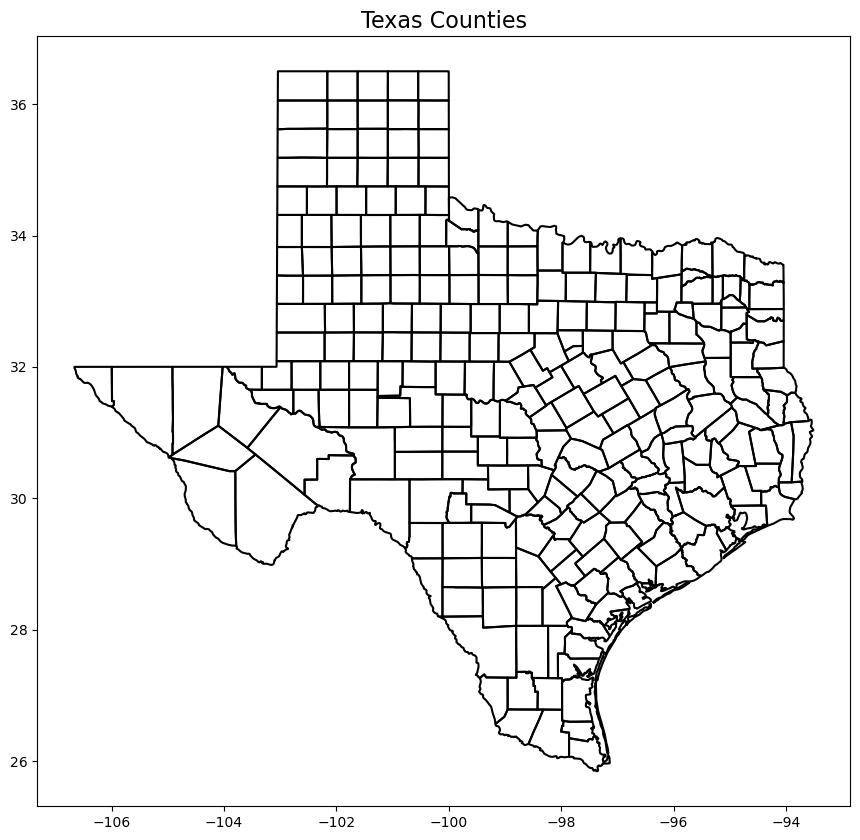

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

unemp = pd.read_csv('unemp.csv')

shapefile = 'ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp'
county = gpd.read_file(shapefile)

unemp['fips'] = unemp['fips'].astype(str)
county['fips'] = county['ADM2_CODE'].str.replace('USA-', '')

merged_data = county.merge(unemp, on='fips', how='left')

texas = merged_data[merged_data['ISO_3166_2'] == 'US-48']

texas.boundary.plot(figsize=(15, 10), color='black')

plt.title('Texas Counties', fontsize=16)

plt.show()

#### Part 2.2 creating choropleth maps and customization (10 points)

Make a choropleth maps with unemployment rate. Choose another color map from
https://matplotlib.org/stable/users/explain/colors/colormaps.html. Give a title to the figure (use `plt.title`) as well as a title to the legend. 


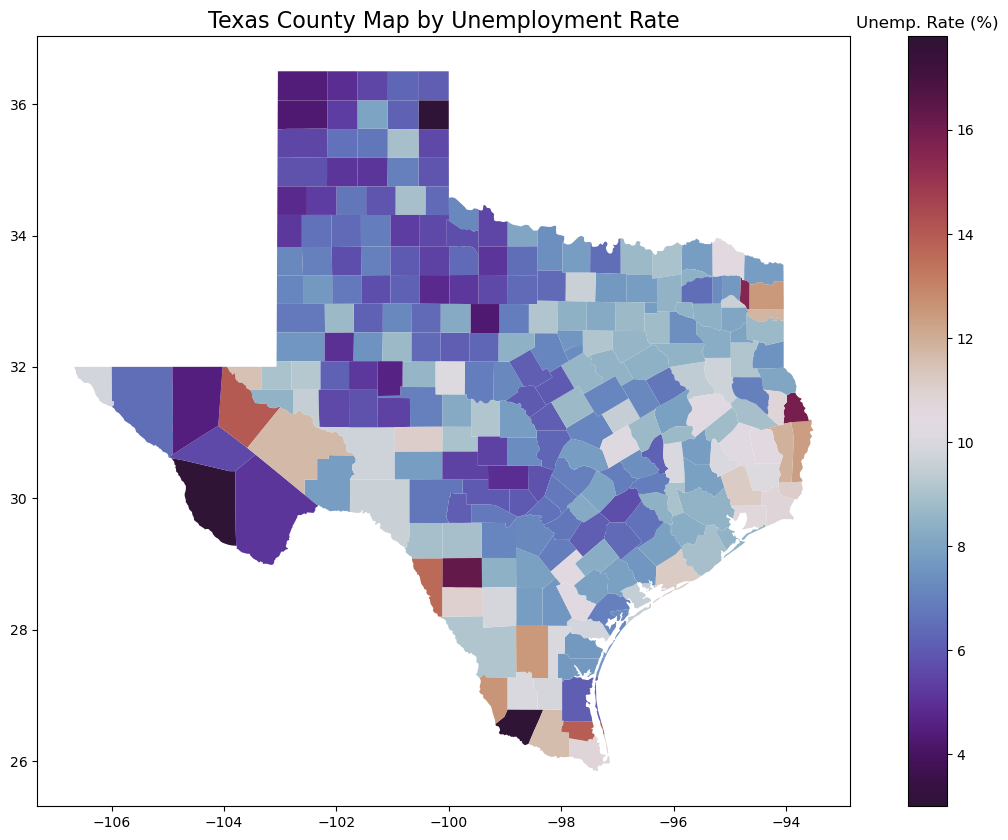

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

unemp = pd.read_csv('unemp.csv')

shapefile = 'ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp'
county = gpd.read_file(shapefile)

unemp['fips'] = unemp['fips'].astype(str)
county['fips'] = county['ADM2_CODE'].str.replace('USA-', '')

merged_data = county.merge(unemp, on='fips', how='left')

texas = merged_data[merged_data['ISO_3166_2'] == 'US-48']

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
texas.plot(column='unemp', cmap='twilight_shifted', legend=True, ax=ax)

plt.title('Texas County Map by Unemployment Rate', fontsize=16)
legend = ax.get_figure().get_axes()[1]  
legend.set_title('Unemp. Rate (%)')  

plt.show()

#### Part 2.3 Handle the missing values (15 points)

Make a copy of your Texas data. Like what we have done in the lecture, randomly select 30 counties and set the unemployment rate as NaN. Plot the choropleth maps for the unemployment rate again. Define the color, boundary, and hatch pattern for the missing value areas. Also include a legend for the missing areas. Chooes a hatch pattern that is different from the lecture note from here: https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html

/var/folders/3x/2syygscs13s73scbrzl3fzpc0000gn/T/ipykernel_38468/566301666.py:52: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


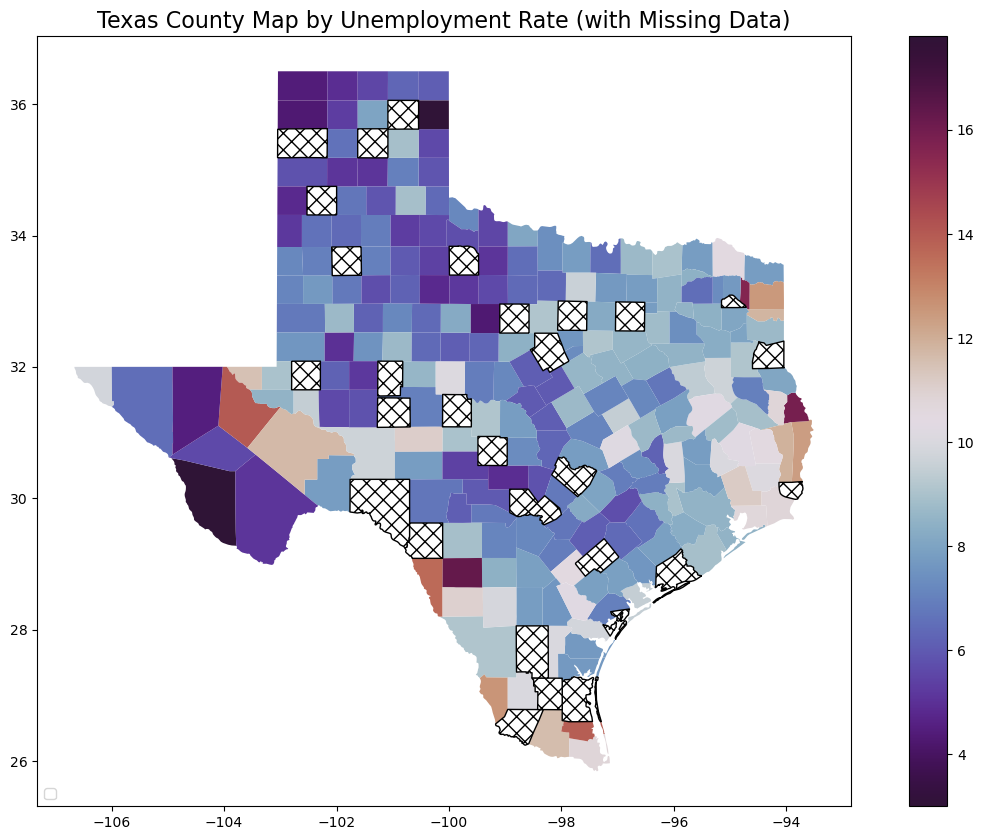

In [32]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

unemp = pd.read_csv('unemp.csv')

shapefile = 'ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp'
county = gpd.read_file(shapefile)

unemp['fips'] = unemp['fips'].astype(str)
county['fips'] = county['ADM2_CODE'].str.replace('USA-', '')

merged_data = county.merge(unemp, on='fips', how='left')

texas = merged_data[merged_data['ISO_3166_2'] == 'US-48']

texas_copy = texas.copy()

np.random.seed(42)  
random_counties = texas_copy.sample(n=30, random_state=42).index
texas_copy.loc[random_counties, 'unemp'] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

texas_copy.plot(
    column='unemp',
    cmap='twilight_shifted',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "white",  
        "edgecolor": "black",  
        "hatch": "xx", 
        "label": "Missing Data" 
    }
)

plt.title('Texas County Map by Unemployment Rate (with Missing Data)', fontsize=16)

ax.legend(loc='lower left', fontsize=10)

plt.show()

#### Part 2.4 Multiple-layer plots (25 points)

There is another attribute in the data which is called `pop`. This attributes represent the population in each county. This is a highly skewed attributed thus we first create a new attribute called `logpop`, which is the log of the population. Then make a map with two layers, one layer is the `logpop` and the second layer is `unemp`. Overlap both layers on the same map. Create one static figure and one interactive figure. In the interactive figure, the user should be able to select one or both layer to show and when they click the county, the information of population and unemployment rate are displayed. 

Note: You may need to create another copy of the data to show both layers. Also, you may need to add some transparency to the top layer so that the bottom layer can be seen. 

In the end, discuss how the overlapping colors and transparency factor affect people's understanding. 

/opt/anaconda3/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


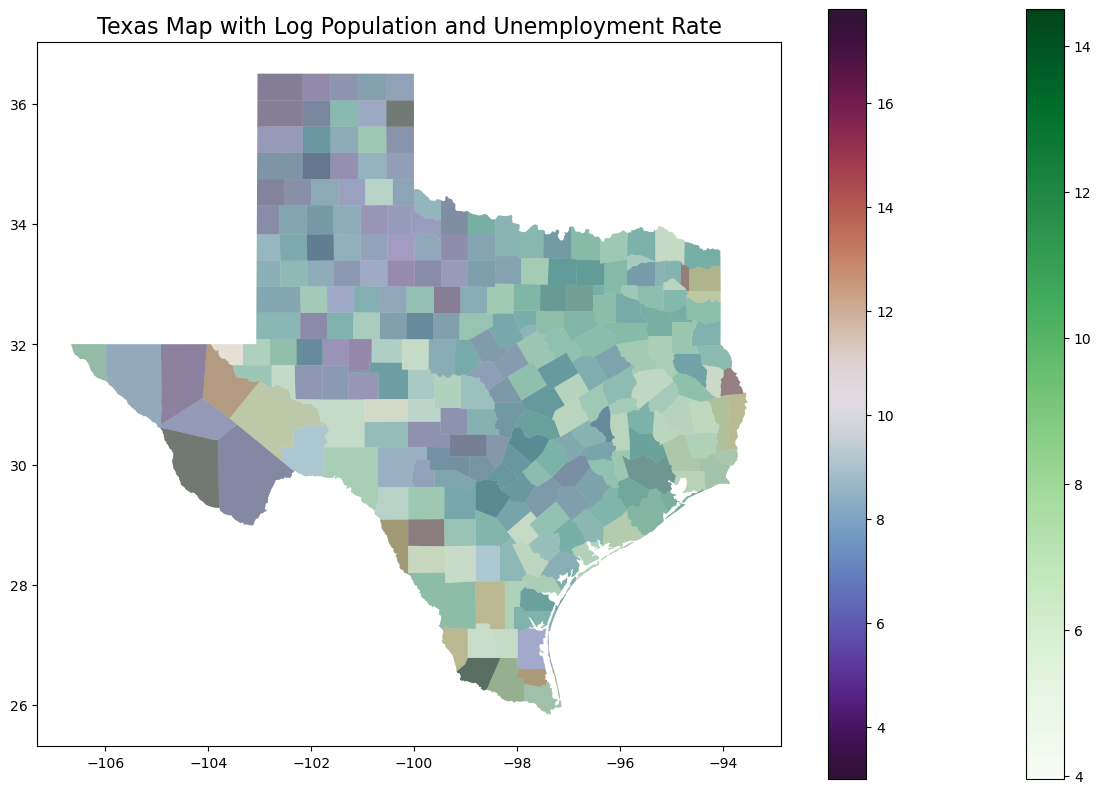

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

unemp = pd.read_csv('unemp.csv')

shapefile = 'ne_10m_admin_2_counties/ne_10m_admin_2_counties.shp'
county = gpd.read_file(shapefile)

unemp['fips'] = unemp['fips'].astype(str)
county['fips'] = county['ADM2_CODE'].str.replace('USA-', '')

merged_data = county.merge(unemp, on='fips', how='left')

texas = merged_data[merged_data['ISO_3166_2'] == 'US-48']

texas['logpop'] = np.log(texas['pop'])

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

texas.plot(column='logpop', cmap='Greens', legend=True, ax=ax, alpha=0.7)

texas.plot(column='unemp', cmap='twilight_shifted', legend=True, ax=ax, alpha=0.5)

plt.title('Texas Map with Log Population and Unemployment Rate', fontsize=16)
plt.show()

In [4]:
import folium
from folium import Choropleth, LayerControl, GeoJson

texas_geojson = texas.to_crs("EPSG:4326").to_json()

m = folium.Map(location=[31.0, -99.0], zoom_start=6)

Choropleth(
    geo_data=texas_geojson,
    data=texas,
    columns=["fips", "logpop"],
    key_on="feature.properties.fips",
    fill_color="YlGnBu", 
    fill_opacity=0.6,
    line_opacity=0.2,
    name="Log Population"
).add_to(m)

Choropleth(
    geo_data=texas_geojson,
    data=texas,
    columns=["fips", "unemp"],
    key_on="feature.properties.fips",
    fill_color="OrRd", 
    fill_opacity=0.6,
    line_opacity=0.2,
    name="Unemployment Rate"
).add_to(m)

GeoJson(
    texas_geojson,
    tooltip=folium.GeoJsonTooltip(
        fields=["pop", "unemp"],
        aliases=["Population", "Unemployment Rate"],
        localize=True
    ),
    name="County Data"  
).add_to(m)

LayerControl().add_to(m)

m.save("texas_interactive_map.html")
m